# Gambler's Ruin Probabilities

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from math import floor, ceil

#------------------------------------------------------------------------------
#plot engine
mpl.use('Qt5Agg')
#print(mpl.get_backend())
#interactive mode on
plt.ion()
#print(plt.isinteractive())
#plot as widget (to be interactive)
%matplotlib widget

#------------------------------------------------------------------------------
# The parametrized function to be plotted
#------------------------------------------------------------------------------
# - Classic Gambler's Ruin
# - probability of winning : conditional prob function P(win | p, b, g)
#w  = lambda p, b, g : (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g) if (p!=0.5)  else  b/g
def win_prob(p, b, g):
  if (b <= 0):
    return 0
  elif b >= g:
    return 1
  elif (p == 0):
    return 0
  elif (p == 1):
    return 1
  elif (p == 0.5):
    return b/g
  else:
    return (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g)
#------------------------------------------------------------------------------
w = lambda p, b, g : 0 if (b<=0) else (1 if (b>=g or p==1) else (0 if (p==0) else (b/g if (p == 0.5) else (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g))))

#------------------------------------------------------------------------------
u = lambda k,p,N: (((1-p)/p)**k -((1-p)/p)**N)  / (1 - ((1-p)/p)**N);
# Evaluating u for p < 1/2 runs into numerical problems with the large fractions. Let us regroup:
u1 = lambda k,p,N: (((1-p)/p)**(k-N) -1)  / (((1-p)/p)**(-N) - 1);
uhalf = lambda k,N: 1 - k/N;


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
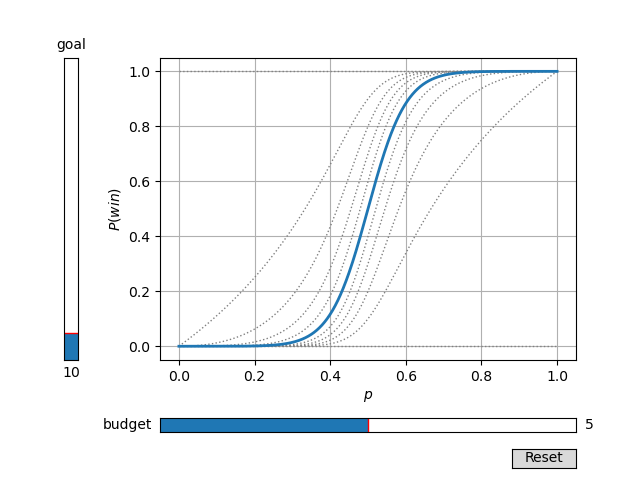

In [3]:
p_arr = np.linspace(0, 1, 1000)

# Define initial parameters
b_def = 5
g_def = 10

# Create the figure and the line that we will manipulate
plt.close()
fig, ax = plt.subplots()
#lines = []

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the initial budget.
ax_b = plt.axes([0.25, 0.1, 0.65, 0.03])
slider_b = Slider(ax=ax_b, label='budget', valstep=1, valmin=0, valmax=g_def, valinit=b_def)

# Make a vertically oriented slider to control the goal
ax_g = plt.axes([0.1, 0.25, 0.0225, 0.63])
slider_g = Slider(ax=ax_g, label="goal", valstep=1, valmin=1, valmax=100, valinit=g_def, orientation="vertical")

line = None

# The function to be called anytime a slider's value changes
def update():
    ax.lines[-1].set_ydata([w(p, slider_b.val, slider_g.val) for p in p_arr])
    fig.canvas.draw_idle()

def update_b(val):
    update()

def update_g(val):
    ax.clear()
    ax.set_xlabel('$p$')
    ax.set_ylabel('$P(win)$')
    ax.grid()
    #lines = {0, 1, floor(val/2), ceil(val/2), val-1, val} 
    #lines = lines.union(set(range(0, ceil(val/2), val//20+1)))
    #lines = lines.union(set(range(val, floor(val/2), -(val//20+1))))
    #for i in lines:
    #for i in range(1, val, val//20+1):
    for i in range(0, val+1):
        l, = ax.plot(p_arr, [w(p, i, val) for p in p_arr], lw=1, ls=':', color='gray')
        #lines += [l]
    line, = ax.plot(p_arr, [w(p, b_def, val) for p in p_arr], lw=2)
    #for l in lines:
    #    ax.lines.remove(l)
    #    #l.remove()
    #    #del lslider_g.on_changed(update_g)
    #lines = []
    slider_b.valmax=val
    slider_b.val=min(slider_b.val, val)
    slider_b.ax.set_xlim(slider_b.valmin,slider_b.valmax)
    fig.canvas.draw_idle()

update_g(g_def)
    
# register the update function with each slider
slider_b.on_changed(update_b)
slider_g.on_changed(update_g)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    slider_b.reset()
    slider_g.reset()

button.on_clicked(reset)

plt.show()

interactive(children=(IntSlider(value=5, description='b'), IntSlider(value=10, continuous_update=False, descri…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
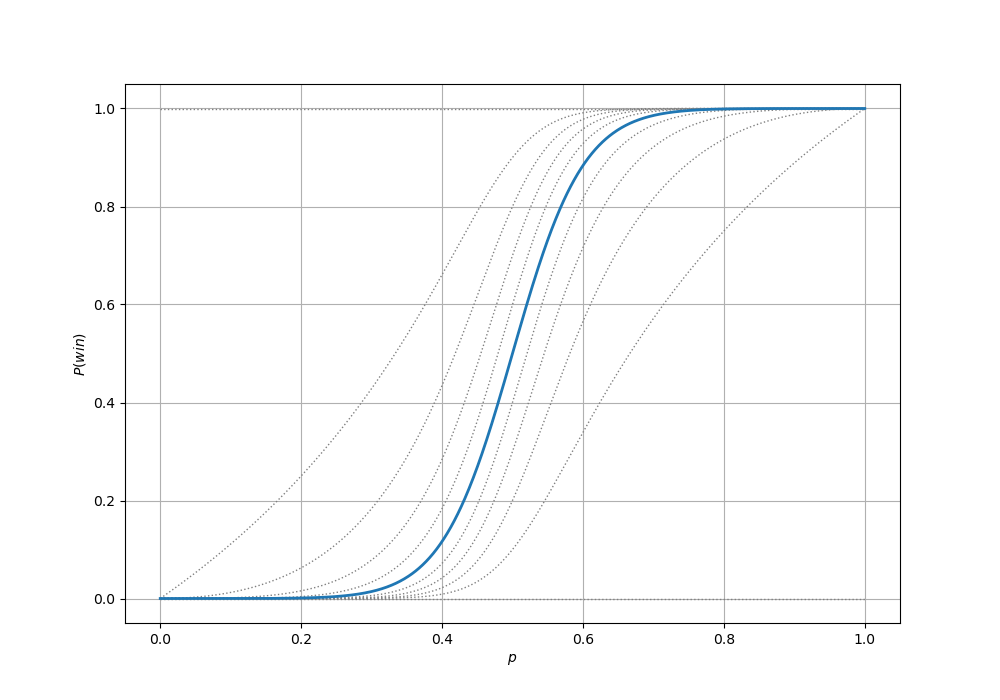

In [4]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual

b_def = 5
g_def = 10

# set up plot
plt.close()
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlabel('$p$')
ax.set_ylabel('$P(win)$')
ax.grid(True)

b_sl = widgets.IntSlider(min=0, max=100, step=1, value=5, continuous_update=True)
g_sl = widgets.IntSlider(min=0, max=100, step=1, value=10, continuous_update=False)

#@widgets.interact(b=(0, 100, 1), g=(0, 100, 1))
@widgets.interact(b=b_sl, g=g_sl, ax=fixed(ax))
def update(b=5, g=10, ax=None):
    b_sl.max=g
    b_sl.value=min(b, g)
    #[l.remove() for l in ax.lines]
    ax.clear()
    ax.set_xlabel('$p$')
    ax.set_ylabel('$P(win)$')
    ax.grid()
    for i in range(0, g+1):
        ax.plot(p_arr, [w(p, i, g) for p in p_arr], lw=1, ls=':', color='gray')
    ax.plot(p_arr, [w(p, b, g) for p in p_arr], lw=2, color='C0')
    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
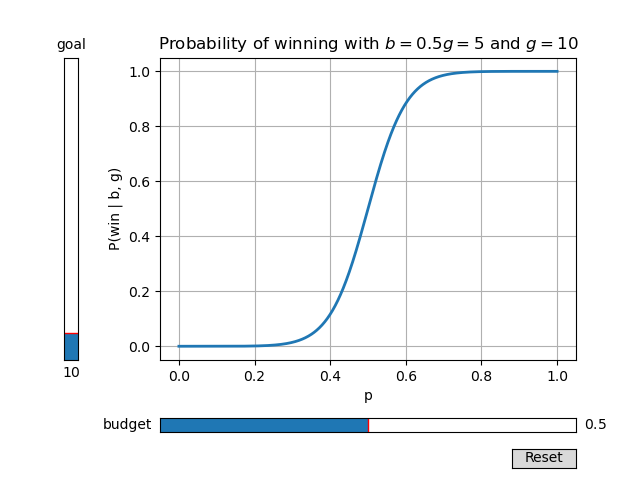

In [6]:
plt.close(fig)

p_arr = np.linspace(0, 1, 1000)

# Define initial parameters
b_def = 0.5
g_def = 10

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(p_arr, [w(p, int(b_def*g_def), g_def) for p in p_arr], lw=2)
ax.set_xlabel('p')
ax.set_ylabel('P(win | b, g)')
ax.set_title(f'Probability of winning with $b={b_def}g={int(b_def*g_def)}$ and $g={g_def}$')
ax.grid()

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the initial budget.
ax_b = plt.axes([0.25, 0.1, 0.65, 0.03])
slider_b = Slider(ax=ax_b, label='budget', valstep=0.01, valmin=0, valmax=1, valinit=b_def)

# Make a vertically oriented slider to control the goal
ax_g = plt.axes([0.1, 0.25, 0.0225, 0.63])
slider_g = Slider(ax=ax_g, label="goal", valstep=1, valmin=1, valmax=100, valinit=g_def, orientation="vertical")


# The function to be called anytime a slider's value changes
def update():
    line.set_ydata([w(p, int(slider_b.val*slider_g.val), slider_g.val) for p in p_arr])
    fig.canvas.draw_idle()

def update_b(val):
    update()

def update_g(val):
    update()

# register the update function with each slider
slider_b.on_changed(update_b)
slider_g.on_changed(update_g)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    slider_b.reset()
    slider_g.reset()

button.on_clicked(reset)

plt.show()